1. Spark Setup


In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 51 kB/s 
     |████████████████████████████████| 200 kB 57.5 MB/s 
     |████████████████████████████████| 199 kB 71.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=4e64e36a0736e8983f2e974552eee2ed53ffd0dfc713037aef742d1f39daac00
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession


In [ ]:
spark = SparkSession.builder.appName("test").getOrCreate()


2. Define the schema for loading the Chicago crime dataset

In [ ]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)


crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

3. Load the Chicago crime data

In [64]:
crimes_df = spark.read.csv("/content/Crimes_-_2001_to_Present.csv",
                       header = True, 
                        schema = crimes_schema)

In [ ]:
#crimes_df.columns

In [65]:
print(" The crimes dataframe has {} records".format(crimes_df.count()))


 The crimes dataframe has 4056279 records


4.a Remove all null values.

In [66]:
test = crimes_df.dropna(how='all', thresh=None, subset=None)

In [67]:
test.show(10, truncate = False)

+--------+----------+----------------------+-----------------------+----+------------------+-----------------------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+-----------------------------+
|ID      |CaseNumber|Date                  |Block                  |IUCR|PrimaryType       |Description                        |LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn|Latitude    |Longitude    |Location                     |
+--------+----------+----------------------+-----------------------+----+------------------+-----------------------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+-----------------------------+
|10224738|HY411648  |09/05/2015 01:30:00 PM|043XX S WOOD ST        |0486|BATTERY           |DO

4.b  Change Date Column Data Type String to TimeStamp

In [68]:
from datetime import datetime
from pyspark.sql.functions import col,udf

myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df = test.withColumn('Date_time', myfunc(col('Date'))).drop("Date")


In [69]:
df.select(df["Date_time"]).show(5)


+-------------------+
|          Date_time|
+-------------------+
|2015-09-05 13:30:00|
|2015-09-04 11:30:00|
|2018-09-01 00:01:00|
|2015-09-05 12:45:00|
|2015-09-05 13:00:00|
+-------------------+
only showing top 5 rows



In [ ]:
#df.select("Date_time").show(10, truncate = False)

In [70]:
df.dtypes


[('ID', 'string'),
 ('CaseNumber', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('PrimaryType', 'string'),
 ('Description', 'string'),
 ('LocationDescription', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('CommunityArea', 'string'),
 ('FBICode', 'string'),
 ('XCoordinate', 'double'),
 ('YCoordinate', 'double'),
 ('Year', 'int'),
 ('UpdatedOn', 'date'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string'),
 ('Date_time', 'timestamp')]

5. Filter the data for last ten years.


In [ ]:
#df.select("Year").show(10, truncate = False)

In [71]:
df.where(df["Year"] > 2012).select('Year').show(20)

+----+
|Year|
+----+
|2015|
|2015|
|2018|
|2015|
|2015|
|2015|
|2015|
|2015|
|2015|
|2016|
|2015|
|2015|
|2015|
|2015|
|2015|
|2015|
|2015|
|2015|
|2015|
|2015|
+----+
only showing top 20 rows



In [72]:
df =df.where(df["Year"] > 2012)

In [73]:
df.show(20)

+--------+----------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+--------------------+-------------------+
|      ID|CaseNumber|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn|    Latitude|    Longitude|            Location|          Date_time|
+--------+----------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+------------+-------------+--------------------+-------------------+
|10224738|  HY411648|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|           61|    08B|  1165074.0|  18

6. Remove all the records with the following crime types:

In [74]:
df.select("PrimaryType").show(10, truncate = False)

+------------------+
|PrimaryType       |
+------------------+
|BATTERY           |
|THEFT             |
|THEFT             |
|NARCOTICS         |
|ASSAULT           |
|BURGLARY          |
|BURGLARY          |
|THEFT             |
|ROBBERY           |
|DECEPTIVE PRACTICE|
+------------------+
only showing top 10 rows



In [ ]:
#crimes_df.where(crimes_df["PrimaryType"] == "OTHER OFFENSE").count()


In [77]:
df = df.where("PrimaryType <> 'OTHER OFFENSE'")
df = df.where("PrimaryType <> 'NON-CRIMINAL'")
df = df.where("PrimaryType <> 'STALKING'")
df = df.where("PrimaryType <> 'NON-CRIMINAL (SUBJECT SPECIFIED)'")
df = df.where("PrimaryType <> 'ARSON'")

In [78]:
df.select("PrimaryType").distinct().show(n = 35)


+--------------------+
|         PrimaryType|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|OTHER NARCOTIC VI...|
|INTERFERENCE WITH...|
+--------------------+



7. Merge the similar crime types.


In [84]:
from pyspark.sql.functions import regexp_replace


In [85]:
df =df.withColumn('PrimaryType', regexp_replace('PrimaryType', 'PROSTITUTION', 'SEX OFFENSE'))
df =df.withColumn('PrimaryType', regexp_replace('PrimaryType', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE'))
df =df.withColumn('PrimaryType', regexp_replace('PrimaryType', 'HUMAN TRAFFICKING', 'SEX OFFENSE'))
df =df.withColumn('PrimaryType', regexp_replace('PrimaryType', 'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE'))


In [86]:
df =df.withColumn('PrimaryType', regexp_replace('PrimaryType', 'MOTOR VEHICLE THEFT', 'THEFT'))
df =df.withColumn('PrimaryType', regexp_replace('PrimaryType', 'BURGLARY', 'THEFT'))
df =df.withColumn('PrimaryType', regexp_replace('PrimaryType', 'ROBBERY', 'THEFT'))


In [87]:
df.select("PrimaryType").distinct().show(n = 35)


+--------------------+
|         PrimaryType|
+--------------------+
|OFFENSE INVOLVING...|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
|               THEFT|
|             BATTERY|
|            HOMICIDE|
|    PUBLIC INDECENCY|
|        INTIMIDATION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|          KIDNAPPING|
|   WEAPONS VIOLATION|
|OTHER NARCOTIC VI...|
|INTERFERENCE WITH...|
+--------------------+



8. Show year-wise trend of the crime for last ten years.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df.groupBy("Year").count().show()


+----+------+
|Year| count|
+----+------+
|2018|241595|
|2015|133266|
|2022|    92|
|2013|   427|
|2014|   993|
|2019| 93281|
|2020| 10984|
|2016|243791|
|2017|242879|
|2021|  1617|
+----+------+



In [51]:
df.groupBy("Year").count().collect()


[Row(Year=2018, count=241595),
 Row(Year=2015, count=133266),
 Row(Year=2022, count=92),
 Row(Year=2013, count=427),
 Row(Year=2014, count=993),
 Row(Year=2019, count=93281),
 Row(Year=2020, count=10984),
 Row(Year=2016, count=243791),
 Row(Year=2017, count=242879),
 Row(Year=2021, count=1617)]

In [52]:
count = [item[1] for item in df.groupBy("Year").count().collect()]
year = [item[0] for item in df.groupBy("Year").count().collect()]

In [53]:
number_of_crimes_per_year = {"count":count, "year" : year}


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
number_of_crimes_per_year = pd.DataFrame(number_of_crimes_per_year)


In [56]:
number_of_crimes_per_year.head()


,count,year
0,241595,2018
1,133266,2015
2,92,2022
3,427,2013
4,993,2014


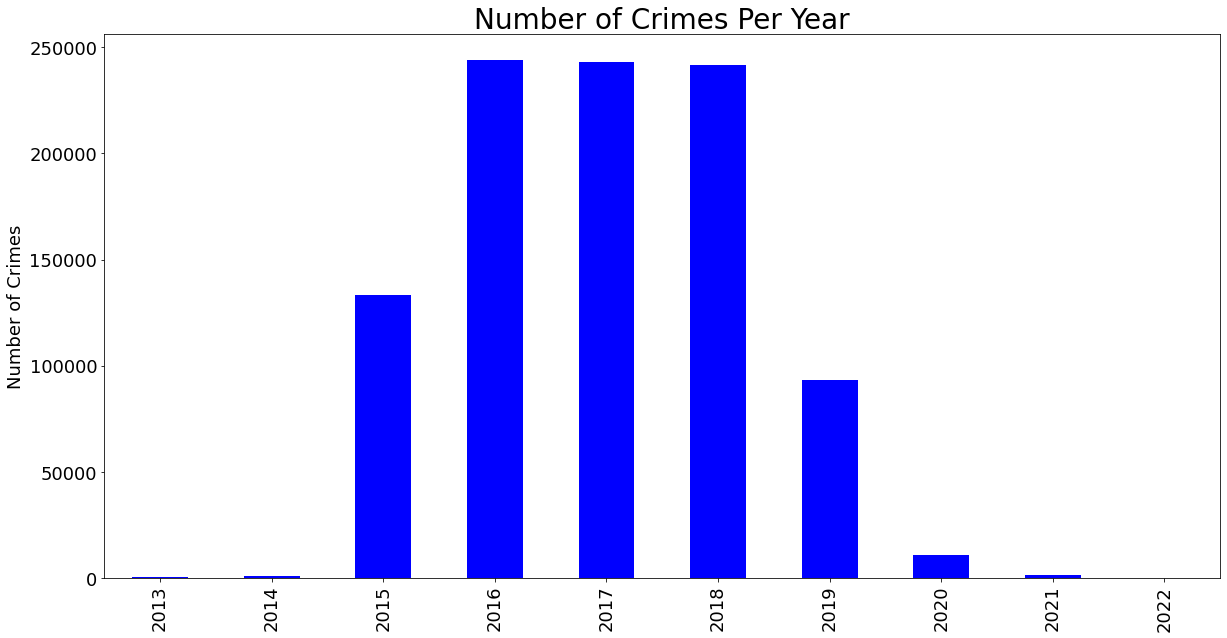

In [57]:
number_of_crimes_per_year = number_of_crimes_per_year.sort_values(by = "year")

number_of_crimes_per_year.plot(figsize = (20,10), kind = "bar", color = "blue",
                               x = "year", y = "count", legend = False)

plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

8. Find out at which hour of the day crime is highest.

In [58]:
from pyspark.sql.functions import date_format
df = df.withColumn("DayOfWeek", date_format("Date_time","E")).\
      withColumn("DayOfWeek_number", date_format("Date_time","u")).\
      withColumn("HourOfDay", date_format("Date_time","H"))
weekDaysCount  = df.groupBy(["DayOfWeek", "DayOfWeek_number"]).count()


In [59]:
df.printSchema()


root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: date (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Date_time: timestamp (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- DayOfWeek_number: string (nullable = true)
 |-- HourOfDay: s

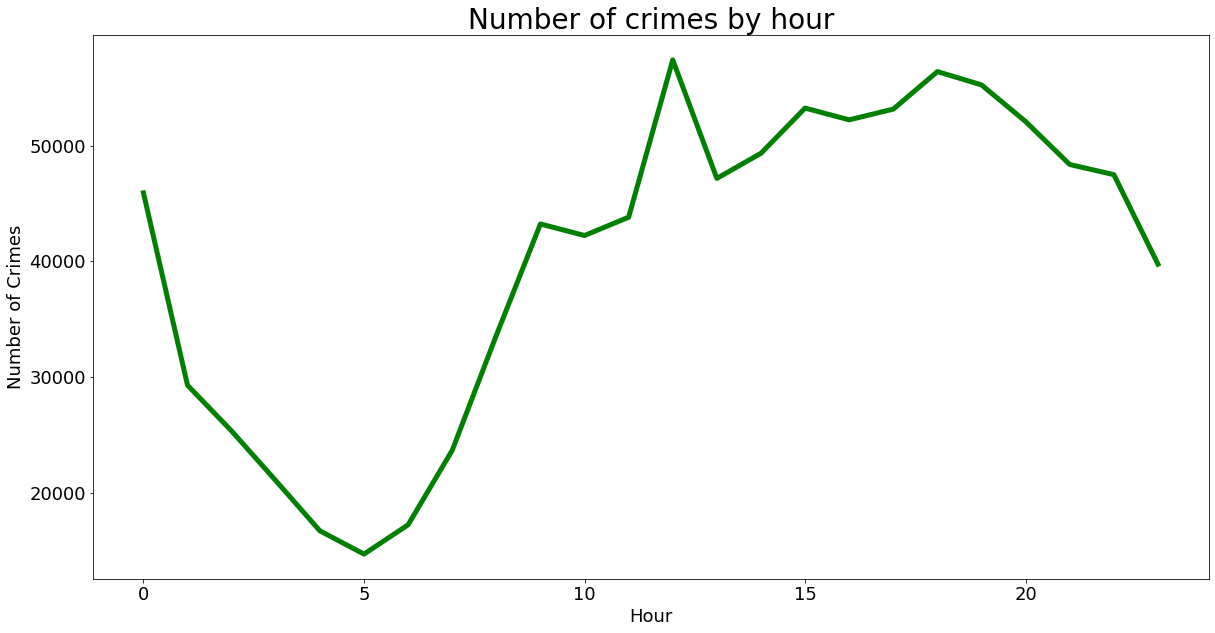

In [60]:
df = df.select(df['HourOfDay'].cast('int').alias('HourOfDay'))
hourlyCount  = df.groupBy(["HourOfDay"]).count().collect()

hours = [item[0] for item in hourlyCount]
count = [item[1] for item in hourlyCount]

crime_byHour = {"count": count, "hours": hours}
crime_byHour = pd.DataFrame(crime_byHour)
crime_byHour = crime_byHour.sort_values(by = "hours", ascending  = True)


crime_byHour.plot(figsize = (20,10), kind = "line", x = "hours", y = "count", 
                      color = "green", linewidth = 5, legend = False)

plt.ylabel("Number of Crimes", fontsize = 18)
plt.xlabel("Hour", fontsize = 18)
plt.title("Number of crimes by hour", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

8. Find top ten crimes and present them as a bar chart.

In [88]:
df.groupBy("PrimaryType").count().show()


+--------------------+------+
|         PrimaryType| count|
+--------------------+------+
|OFFENSE INVOLVING...|  9325|
|PUBLIC PEACE VIOL...|  6881|
|           OBSCENITY|   274|
|            GAMBLING|   833|
|   CRIMINAL TRESPASS| 27769|
|             ASSAULT| 79630|
|LIQUOR LAW VIOLATION|   990|
|               THEFT|397530|
|             BATTERY|206619|
|            HOMICIDE|    34|
|    PUBLIC INDECENCY|    47|
|        INTIMIDATION|   617|
|  DECEPTIVE PRACTICE| 77169|
|CONCEALED CARRY L...|   381|
|         SEX OFFENSE| 13604|
|     CRIMINAL DAMAGE|122345|
|           NARCOTICS| 58844|
|          KIDNAPPING|   775|
|   WEAPONS VIOLATION| 19681|
|OTHER NARCOTIC VI...|    22|
+--------------------+------+
only showing top 20 rows



In [90]:
crime_type  = df.groupBy("PrimaryType").count().collect()
location = [item[0] for item in crime_type]
count = [item[1] for item in crime_type]
crime_type = {"Crime_type" : location, "count": count}
crime_type = pd.DataFrame(crime_type)
crime_type = crime_type.sort_values(by = "count", ascending  = False)
crime_type.iloc[:5]

,Crime_type,count
7,THEFT,397530
8,BATTERY,206619
15,CRIMINAL DAMAGE,122345
5,ASSAULT,79630
12,DECEPTIVE PRACTICE,77169


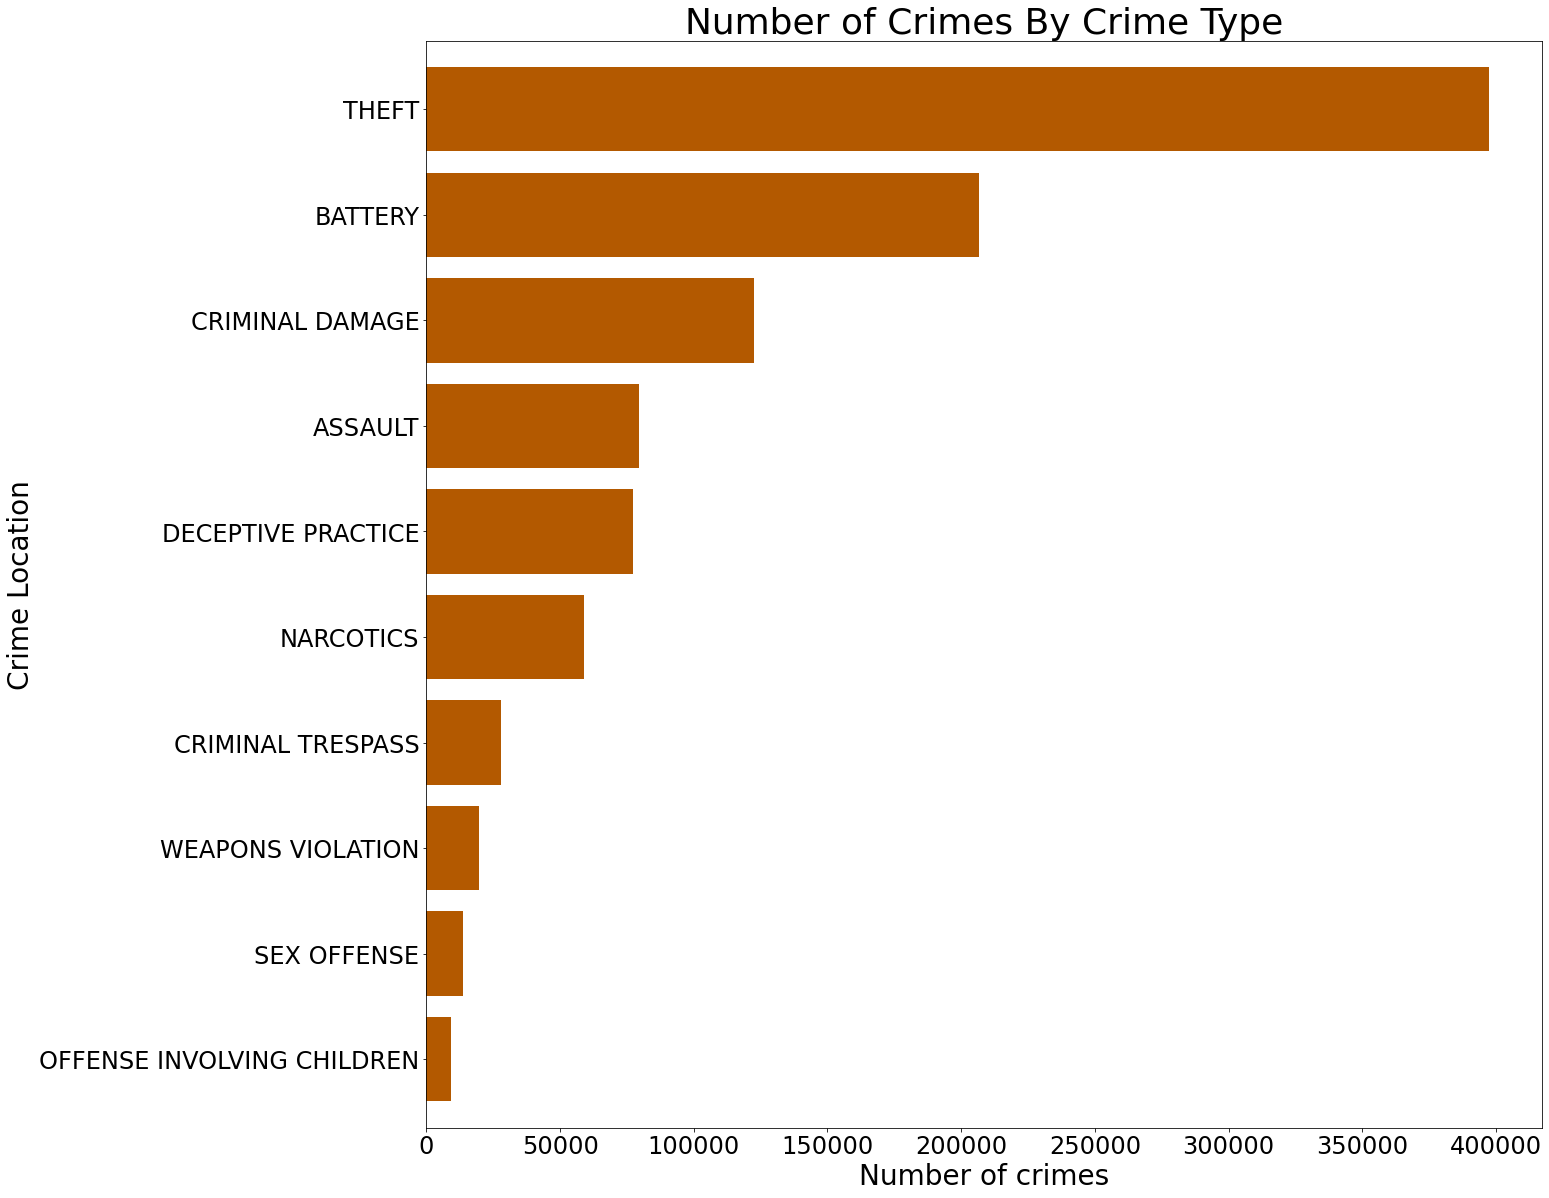

In [93]:
crime_type = crime_type.iloc[:10]

myplot = crime_type.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "Crime_type", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Location", fontsize = 28)
plt.title("Number of Crimes By Crime Type", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()